# Introdução ao machine learning com o Python e o Azure Notebooks 

### Analisar dados de clima com o Azure Notebooks

Crie um Azure Notebook e use três bibliotecas populares do Python para analisar dados de clima coletados pela NASA e, em seguida, compartilhá-los.

Neste módulo, você vai:

* Criar um notebook no Azure Notebooks
* Carregar, manipular e visualizar dados em um notebook
* Compartilhar notebooks online

### Notebook para Análise de Dados Climáticos

In [11]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
import seaborn as sns; sns.set()

### Importando Dados

In [13]:
yearsBase, meanBase = np.loadtxt('5-year-mean-1951-1980.csv', delimiter=',', usecols=(0, 1), unpack=True)
years, mean = np.loadtxt('5-year-mean-1882-2014.csv', delimiter=',', usecols=(0, 1), unpack=True)

In [15]:
yearsBase

array([1951., 1952., 1953., 1954., 1955., 1956., 1957., 1958., 1959.,
       1960., 1961., 1962., 1963., 1964., 1965., 1966., 1967., 1968.,
       1969., 1970., 1971., 1972., 1973., 1974., 1975., 1976., 1977.,
       1978., 1979., 1980.])

In [20]:
years

array([1882., 1883., 1884., 1885., 1886., 1887., 1888., 1889., 1890.,
       1891., 1892., 1893., 1894., 1895., 1896., 1897., 1898., 1899.,
       1900., 1901., 1902., 1903., 1904., 1905., 1906., 1907., 1908.,
       1909., 1910., 1911., 1912., 1913., 1914., 1915., 1916., 1917.,
       1918., 1919., 1920., 1921., 1922., 1923., 1924., 1925., 1926.,
       1927., 1928., 1929., 1930., 1931., 1932., 1933., 1934., 1935.,
       1936., 1937., 1938., 1939., 1940., 1941., 1942., 1943., 1944.,
       1945., 1946., 1947., 1948., 1949., 1950., 1951., 1952., 1953.,
       1954., 1955., 1956., 1957., 1958., 1959., 1960., 1961., 1962.,
       1963., 1964., 1965., 1966., 1967., 1968., 1969., 1970., 1971.,
       1972., 1973., 1974., 1975., 1976., 1977., 1978., 1979., 1980.,
       1981., 1982., 1983., 1984., 1985., 1986., 1987., 1988., 1989.,
       1990., 1991., 1992., 1993., 1994., 1995., 1996., 1997., 1998.,
       1999., 2000., 2001., 2002., 2003., 2004., 2005., 2006., 2007.,
       2008., 2009.,

### Criando um gráfico de dispersão

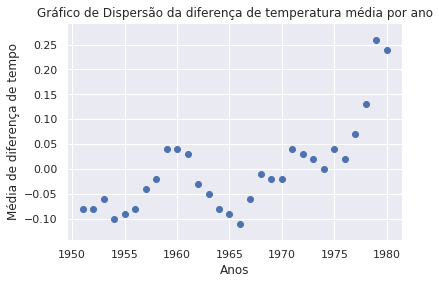

In [24]:
plt.scatter(yearsBase, meanBase)
plt.title('Gráfico de Dispersão da diferença de temperatura média por ano')
plt.xlabel('Anos', fontsize=12)
plt.ylabel('Média de diferença de tempo', fontsize=12)
plt.show()

O conjunto de dados carregado usa uma média de 30 anos entre 1951 e 1980 para calcular uma temperatura base para esse período e, em seguida, usa temperaturas médias de 5 anos para calcular a diferença entre a média de 5 anos e a média de 30 anos de cada ano. O gráfico de dispersão mostra as diferenças de temperatura anuais.

### Executando Regressão Linear

Os gráficos de dispersão oferecem um meio útil para a visualização de dados, mas suponha que você queira sobrepor o gráfico de dispersão com uma linha de tendência que mostra a tendência dos dados ao longo do tempo. Uma maneira de calcular essas linhas de tendência é a regressão linear. 

#### *O NumPy será utilizado para executar uma regressão linear e o Matplotlib para desenhar uma linha de tendência dos dados.*

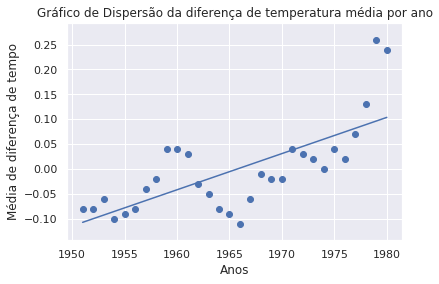

 y = 0.007279199110122221 * x + -14.309265850945222


In [25]:
# Cria a regressão linear dos data points
m,b = np.polyfit(yearsBase, meanBase, 1)

# Cria funcao com retorno de uma funcao do tipo y = mx + b (linear simples)
def f(x):
    return m*x + b

# Gera o mesmo gráfico de dispersão anterior, mas adiciona o plot da funcao linear acima:
plt.scatter(yearsBase, meanBase)
plt.plot(yearsBase, f(yearsBase))
plt.title('Gráfico de Dispersão da diferença de temperatura média por ano')
plt.xlabel('Anos', fontsize=12)
plt.ylabel('Média de diferença de tempo', fontsize=12)
plt.show()

# Imprime os valores de m e b
print(' y = {0} * x + {1}'.format(m, b))
plt.show()

Na linha de regressão, você pode ver que a diferença entre as temperaturas médias de 30 anos e as temperaturas médias de 5 anos está aumentando ao longo do tempo.

#### *A maior parte do trabalho computacional necessário para gerar a linha de regressão foi feita pela função polyfit do NumPy, que calculou os valores m e b na equação *
#### *y = mx + b.*

### Executando Regressão Linear com o Scikit-learn

Outra biblioteca popular do Python que é amplamente usada na comunidade de pesquisas é o **Scikit-learn**, que se destaca na **criação de modelos de machine learning para ajudar a extrair informações de dados**. Neste exercício, você usaremos o Scikit-learn (que já foi importado na Unidade 2 para calcular uma linha de tendência para os dados de clima da NASA).

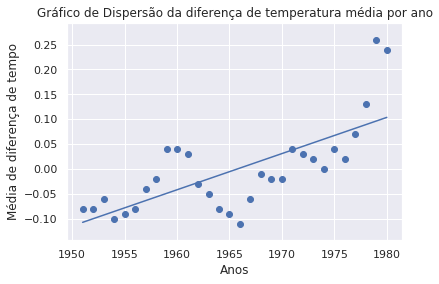

 y = 0.007279199110122357 * x + -14.309265850945492


In [26]:
# Instanciando o modelo de regressão linear
model = LinearRegression(fit_intercept=True)

# Ajuste/construa o modelo
model.fit(yearsBase[:, np.newaxis], meanBase)
mean_predicted = model.predict(yearsBase[:, np.newaxis])


# Gera o gráfico de dispersão como o do exercicio anterior
plt.scatter(yearsBase, meanBase)
plt.plot(yearsBase, mean_predicted)
plt.title('Gráfico de Dispersão da diferença de temperatura média por ano')
plt.xlabel('Anos', fontsize=12)
plt.ylabel('Média de diferença de tempo', fontsize=12)
plt.show()

print(' y = {0} * x + {1}'.format(model.coef_[0], model.intercept_))

A saída é quase idêntica à saída do exercício anterior. **A diferença é que o Scikit-learn fez a maior parte do trabalho**. Especificamente, você não precisou codificar uma função de linha como fez com o NumPy; a função LinearRegression do Scikit-learn fez isso para você. 

#### O Scikit-learn é compatível com muitos diferentes tipos regressão, que são úteis na criação de modelos de machine learning sofisticados.

### Executando regressão linear com o Seaborn

Um dos aspectos interessantes do Azure Notebooks – e do Python em geral – é que há **milhares de bibliotecas de software livre que você pode aproveitar para realizar tarefas complexas sem muita codificação**. Nesta unidade, utilizaremos o **Seaborn, uma biblioteca para visualização estatística**, a fim de plotar o segundo dos dois conjuntos de dados carregados, que abrange os anos de 1882 a 2014.

#### O Seaborn pode criar uma linha de regressão acompanhada por uma projeção que mostra o local em que os pontos de dados devem ficar com base na regressão com uma chamada de função simples.

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


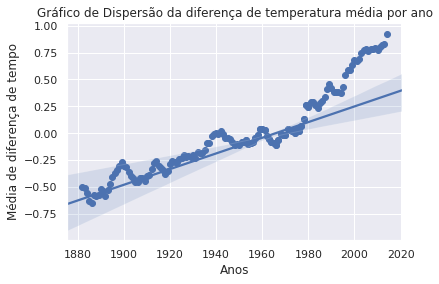

In [29]:
plt.scatter(years, mean)
plt.title('Gráfico de Dispersão da diferença de temperatura média por ano')
plt.xlabel('Anos', fontsize=12)
plt.ylabel('Média de diferença de tempo', fontsize=12)
sns.regplot(yearsBase, meanBase)
plt.show()

Observe como os pontos de dados para os primeiros 100 anos estão em perfeita conformidade com os valores previstos, ao contrário dos pontos de dados de aproximadamente 1980 em diante. São modelos como esses que levam os cientistas a acreditar que as mudanças climáticas estão sendo aceleradas.